# Notebook 8: Information Theory

Computational Biology 2 - WS 23/24

Material created by Katharina Bracher and Florian Eberhardt.

In [1]:
import numpy as np
p = [0.8, 0.1, 0.05, 0.05]
def entropy(p):
    entropy = 0.
    for pi in p:
        entropy += - pi* np.log2(pi)
    return entropy
entropy(p)

1.0219280948873624

In [2]:
0.8 * 1 + 0.1 * 2 + 0.05*3 + 0.05*3

1.2999999999999998

In [3]:
p = [0.25]*4
entropy(p)

2.0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats

/home/work/.conda/envs/py39env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/work/.conda/envs/py39env/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Problem 1: Entropy of a fair dice
Compute the entropy for different fair dice with 4,6,8,10,12,20 sides respectively.
How would the entropy change if the dice were unfair?

### Problem 2: Mutual information
You are playing 'Mensch ärgere Dich nicht!' with three friends over the phone. Your first friend is always honest. However, your second and third friends are cheating. In one out of two cases, whenever your second friend does not roll a 6, your friend increases the number showing up by 1. Your third friend rolls a die for you to hear the sound and then reports a random number, independent from the die, but 6 is more likely than all other values. Compute the mutual information in all three cases.

In [5]:
p1 = [0.5,0.5]
entropy(p1)

1.0

In [6]:
p  =[1./6]*6
entropy(p) - 5/6.

1.7516291673878226

# Entropy rate of a spike train
Compute the entropy of a spike train according to equation (4.54) (p. 146, Dayan and Abbott, Theoretical Neuroscience). 
You can simulate a Poisson spike train.

### How to search for a spike pattern along a spike train?


In [7]:
import numpy as np

binarized_spike_train = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0])
pattern = np.array([0, 1, 0, 1])


# Example long array
long_array = binarized_spike_train*2.-1.

# Example short array
short_array = pattern * 2. - 1.
short_array = short_array[::-1]  # reverse, due to negative time argument in filter function

# Find occurrences
occurrences = np.where(np.convolve(short_array, long_array, mode='valid') == len(short_array))[0]

print("Occurrences found at positions:", occurrences)
print("Number of occurrences:", len(occurrences))

Occurrences found at positions: [0 2 4 6]
Number of occurrences: 4


In [8]:
long_array[:4]*short_array

array([-1., -1., -1., -1.])

In [9]:
np.convolve(long_array, short_array, mode='valid')

array([ 4., -4.,  4., -4.,  4., -4.,  4., -4.,  2.,  0.,  0.,  0.,  2.,
       -2.,  0.,  2., -4.])

Explanation:

    np.convolve performs the convolution of two arrays. In this case, it's used to find the occurrences of the short_array in the long_array.
    The mode='valid' parameter ensures that only valid cross-correlation is performed, meaning it only considers positions where the full sequence can fit.

This approach efficiently finds the starting positions of the sequence in the longer array. The variable occurrences contains the indices where the sequence is found.

Note: If the short array is found partially at the beginning or end of the long array, this method won't identify it. If you need to consider such cases, additional handling may be necessary.

### How to create a list of all possible spike patterns of length N?

In [10]:
import numpy as np
from itertools import product

N = 3  # Adjust N to the desired length

# Generate all possible combinations of 0 and 1 for N-length arrays
all_combinations = list(product([0, 1], repeat=N))

# Convert the combinations to NumPy arrays
numpy_arrays = [np.array(combination) for combination in all_combinations]

# Print the result
for arr in numpy_arrays:
    print(arr)

[0 0 0]
[0 0 1]
[0 1 0]
[0 1 1]
[1 0 0]
[1 0 1]
[1 1 0]
[1 1 1]


In this example, product([0, 1], repeat=N) generates all possible combinations of 0 and 1 with a length of N. The result is converted into NumPy arrays using a list comprehension.

Note: Keep in mind that the number of possible combinations grows exponentially with N. For larger values of N, the number of combinations can become very large, and the memory and processing time required to generate and store all combinations may be impractical. Adjust the value of N based on your specific requirements.

In [11]:
# TODO continue here...

for pattern in spiking_patterns:
    count_occurrences(pattern, binary_spike_train)
    

NameError: name 'spiking_patterns' is not defined

# Solution

In [12]:
def generate_patterns(length):
    from itertools import product
    # Generate all possible combinations of 0 and 1 for N-length arrays
    all_combinations = list(product([0, 1], repeat=length))

    # Convert the combinations to NumPy arrays
    pattern_arrays = [np.array(combination) for combination in all_combinations]
    return pattern_arrays

def count_occurences(pattern, binarized_spike_train):
    spike_array = binarized_spike_train*2.-1.

    pattern_array = pattern * 2. - 1.
    pattern_array = pattern_array[::-1]  # reverse, due to negative time argument in filter function

    # Find occurrences
    occurrences = np.where(np.convolve(pattern_array, spike_array, mode='valid') == len(pattern_array))[0]
    
    return len(occurrences)

def entropy_rate(pattern_occurences, sequence_duration):
    entropy = 0.
    total = np.sum(pattern_occurences)
    for n_pattern in pattern_occurences:
        if n_pattern > 0:
            p_B = n_pattern / total
            entropy -= p_B * np.log2(p_B)
            
    entropy_rate= entropy / sequence_duration
    return entropy_rate

In [14]:
spike_times = np.loadtxt('./grasshopper_spike_times1.txt')
# time points in the data are in micro s, transform them to milli s
to_milliseconds = 1000
spike_times /= to_milliseconds

print(np.max(spike_times))

delta_t = 3.5 # ms
t_spike_train = 9999.5 # ms, integer multiply of delta_t

time_bins = np.arange(0.,t_spike_train, delta_t)

binarized_spike_train=np.histogram(spike_times,time_bins)[0]
print(np.max(binarized_spike_train))


9999.3
1


In [15]:
sequence_duration = sequence_duration_list[5]
pattern_length = int(sequence_duration / delta_t)
len(binarized_spike_train) / pattern_length

NameError: name 'sequence_duration_list' is not defined

In [16]:
sequence_duration_list = [delta_t * m for m in range(1,17)]  # ms, integer multiply of delta_t, <= 56
entropy_rates = []

In [17]:
for sequence_duration in sequence_duration_list:
    print(sequence_duration)
    pattern_length = int(sequence_duration / delta_t)
    all_patterns = generate_patterns(pattern_length)
    
    occurences = []
    for pattern in all_patterns:
        occurences.append( count_occurences(pattern, binarized_spike_train) )
        
    entropy_rates.append(entropy_rate(occurences, sequence_duration) * 1000.) # convert to seconds

3.5
7.0
10.5
14.0
17.5
21.0
24.5
28.0
31.5
35.0
38.5
42.0
45.5
49.0
52.5
56.0


limit value:  236.0521409410746 bits/second


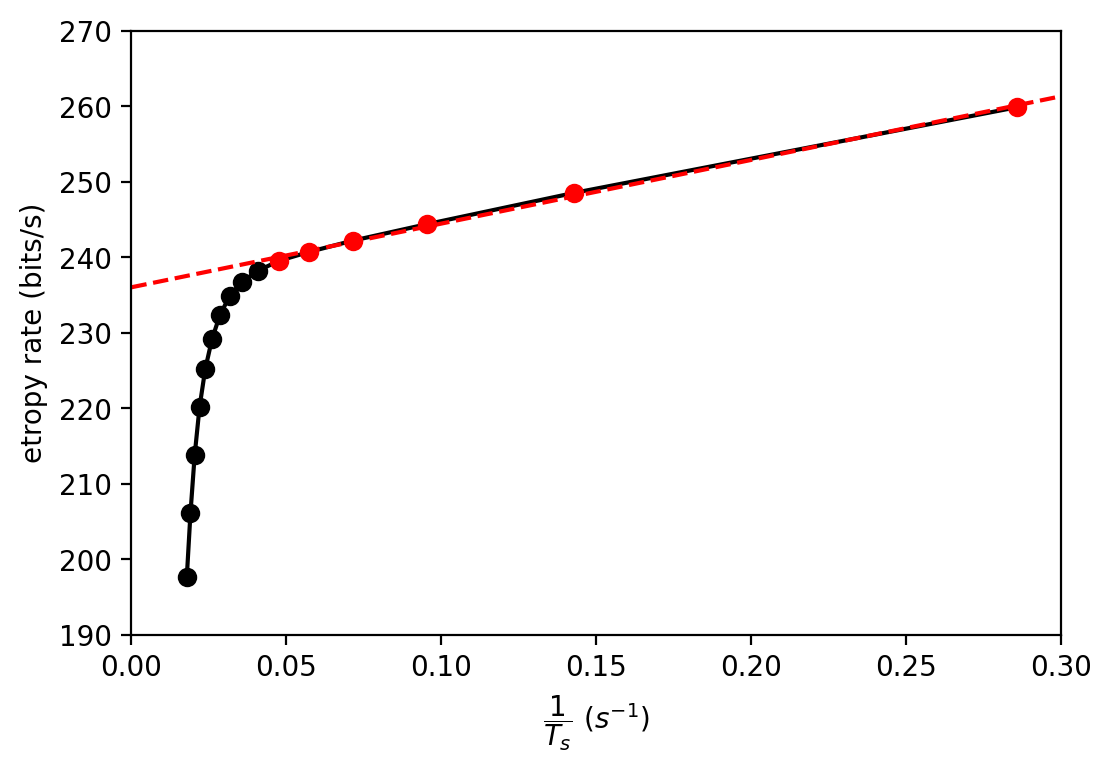

In [18]:
import matplotlib.pyplot as plt

x = 1./np.array(sequence_duration_list)[:6]
y = entropy_rates[:6]
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

fig = plt.figure(dpi=200)
plt.plot(1./np.array(sequence_duration_list), entropy_rates, 'k-')
plt.plot(1./np.array(sequence_duration_list)[:6], entropy_rates[:6], 'ro')
plt.plot(1./np.array(sequence_duration_list)[6:], entropy_rates[6:], 'ko')
plt.plot([0.,0.3], poly1d_fn([0.,0.3]), 'r--')
plt.xlim(0.,0.3)
plt.ylim(190,270)
plt.xlabel('$\dfrac{1}{T_s}$ ($s^{-1}$)')
plt.ylabel('etropy rate (bits/s)')
print('limit value: ',coef[1], 'bits/second')

### Upper Bound according to Chapter 4.3 in Theroetical Neuroscience by Dayan & Abbott

In [19]:
delta_tau = delta_t  * 0.001
rate = len(spike_times) / t_spike_train * 1000
entropy_rate_bound = rate / np.log(2)*(1.- np.log(rate * delta_tau))
entropy_rate_bound

284.60832437484396

92.9046452322616